# King County (USA) House Price Prediction

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modelling](#cell_model)

4. [Business Implication](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

**Business Problem**

The fluctuation of house pricing has great impact on real estate companies in terms of influencing most of their revenue sourced from sales volumns, turnovers, profit margin and commissions in the housing market. House price prediction is essential for real estate companies to provide professional pricing advices to their clients to optimise the balance between buyer and sellers and thus maximising their commissions and customer satisfactions. In the strategic level, the forecast assist to capture the coming trend to aid their strategic decision making.

**Business Benefit**

Rapid development of deep learning techniques, such as Neural Networks ('NN"), provides high potential to generate more accurate house price predictions by ultilising the 'big data' of the housing market. Notably, while the trend of housing price is usually non-linear, Neural Networks empowered models is capable to capture the pattern and making timely and precise predictions. In this sense, such technique maximise the values of data that real estate companies have to provide insights to facilitate decision making.

**Methodology**

A dataset containing more than 21,600 house sales in King County, USA, are used to build two models for predicting actual house price and classifying the price class respectively based on house features (Source: https://www.kaggle.com/datasets/minasameh55/king-country-houses-aa). The model performances are compared based on prediction accuracy. The models are:

*   House Price Estimation - Linear Regression Model and Neural Networks Model
*   House Price Classification - k-Nearest Neighbour Model and Neural Networks Classification Model

**Key Findings**


*   The best model for price estimation is the NN model which explains 85.7% of the price variation, with average absolute error of USD 68,000.
*   The best model for price classification is also the NN model with an accuracy rate of about 90% in correctly classifying high price and low price properties based on the house features.
*   Neural Networks Models outperform the other model in both aspect, generating USD 20,000 less average prediction error than linear regression model, and making 4% more accurate price classifications.
*   The experimental results shows adding more hidden layers to the NN model does not have great impact on improving performance. Meanwhile, introducing more parameters does not improve the model performance. Adequately applying drop out is essential to avoid over-fitting.
*   Feeding more data to the model is a direct way to enhance the performance. Also, the model architecture has great impact on model performance. Trial and error is a relatively simple method to identify the suitable model architecture yet it is time consuming.

In conclusion, Neural networks models outperforms traditional statistical models in generating precise estimination. It can make good use of the data that has already been stored in the company to provide valuable insights for the real estate company to make more sophisticated decisions.





<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

**2.1 Data Exploration**

In [1]:
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [3]:
#allow to display unlimited number of columns
pd.set_option('display.max_columns', None)

In [10]:
# Read dataset
df = pd.read_csv('king_county_houses.csv')

# Check whether there is missing values and data type of each attribute
print(df.shape)
print(df.info())

df.head()

(21613, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503




*   Transform 'waterfront','view', and 'zipcode' into nominal varibales.
*   'grade' and 'condition', they are ordinal variables. Keep them as numeric data.

In [12]:
#Generate descriptive summaries for all columns
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


<Axes: title={'center': 'Pearson Correlation Matrix'}>

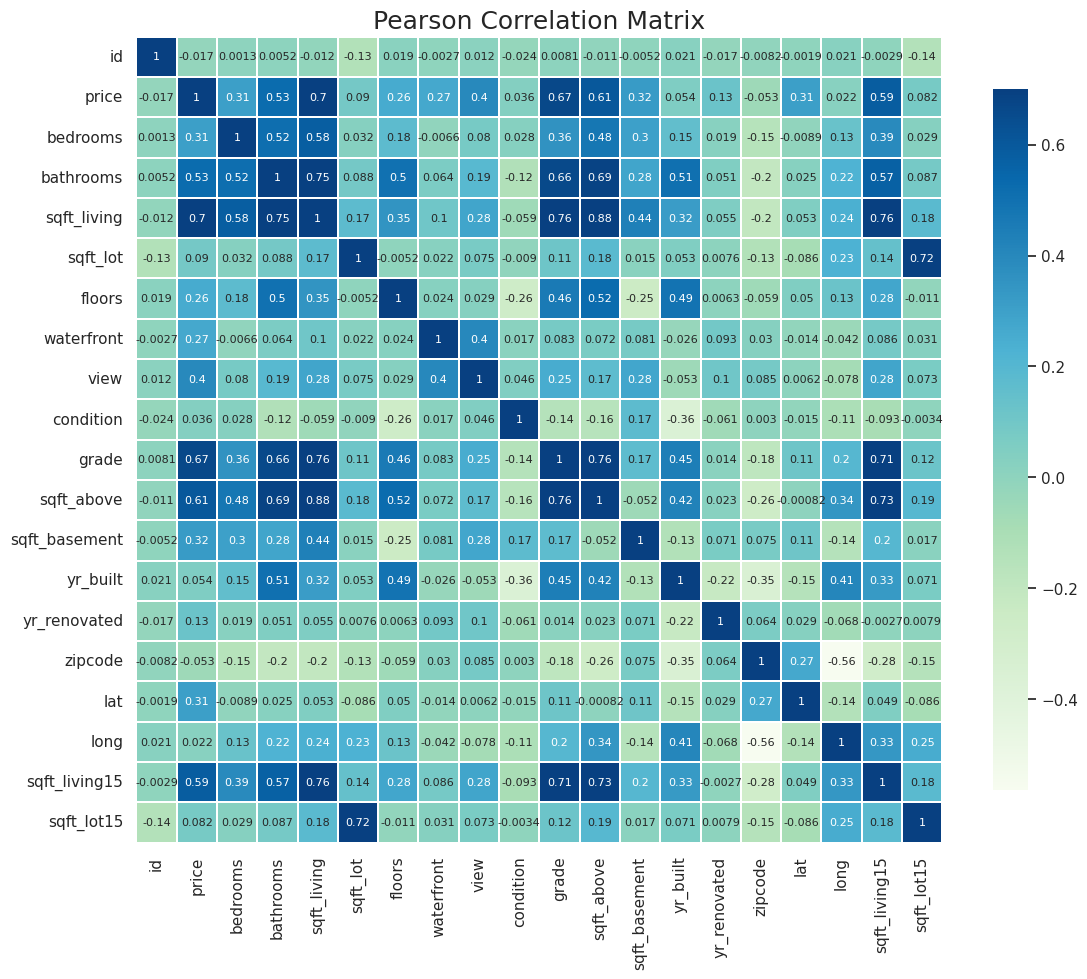

In [14]:
#Generate Correlation Matrix, exclude 'date'
import seaborn as sns

sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=18)
sns.heatmap(df.corr(numeric_only=True),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":8}, cbar_kws={"shrink": .7})

In [15]:
#Sort correlation to price in decending order
sorted_corr = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(sorted_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


*   Three pairs of attributes related to the area size of the house are highly correlated.

1.   sqft_living vs sqft_above (0.88)
2.   sqft_living vs sqft_above (0.88)
3.   sqft_lot vs sqft_lot15 (0.72)



*   Since it is commonly known that living space and land size of the property has great impact on pricing, it is not recommended to remove many of these attributes. Therefore, I remove sqft_above since it has highest correlation with sqft_living while sqft_living is more correlated to the label (0.7). Also, sqft_lot15 will be removed since it shows the lowest correlations with the label.


**Data Distribution**

Based on the descriptive summaries, two attributes appears to have significant class imbalance :

1. Over 75% of properties had not been renovated since being built.
2. Over 50% of properties had no basement.

Further look at the distribution of these two attributes, only 4% of properties has been renovated since built, but about 40% of properties have basement. Therefore, I drop yr_renovated for prediction.

In [16]:
#compute the proportion of properties with renovation and basement respectively
print('Percentage of Properties with Renovation: ', round(len(df[df['yr_renovated']>0])/len(df['yr_renovated'])*100,2), '%')
print('Percentage of Properties with Basement: ', round(len(df[df['sqft_basement']>0])/len(df['sqft_basement'])*100, 2),'%')

Percentage of Properties with Renovation:  4.23 %
Percentage of Properties with Basement:  39.27 %


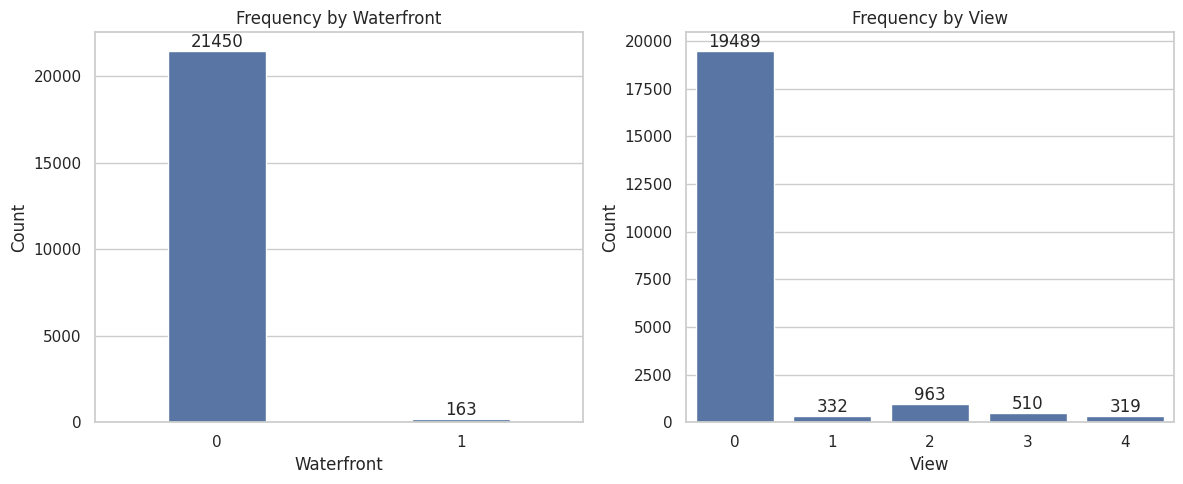

In [17]:
#visualise 'waterfront' and 'view' to see their distributions
#to identify if there is any significant class imbalance.

#transform waterfront and view to nominal data
df['waterfront']=df['waterfront'].astype(str)
df['view']=df['view'].astype(str)

from matplotlib import pyplot as plt
import seaborn as sns

waterfront_counts = df.groupby(['waterfront'])['id'].count().reset_index()
waterfront_counts.columns = ['waterfront', 'count']

view_counts = df.groupby(['view'])['id'].count().reset_index()
view_counts.columns = ['view', 'count']

# Visualise with bar charts for waterfront and view
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=waterfront_counts['waterfront'], y=waterfront_counts['count'], data=waterfront_counts, ax=axes[0], width=0.4)
axes[0].set_title('Frequency by Waterfront')
axes[0].set_xlabel('Waterfront')
axes[0].set_ylabel('Count')
axes[0].bar_label(axes[0].containers[0])  # Add labels on top of the bars

sns.barplot(x=view_counts['view'], y=view_counts['count'], data=view_counts, ax=axes[1])
axes[1].set_title('Frequency by View')
axes[1].set_xlabel('View')
axes[1].set_ylabel('Count')
axes[1].bar_label(axes[1].containers[0])  # Add labels on top of the bars

plt.tight_layout()
plt.show()

The above bar charts show a significant class imbalance in 'waterfront' and 'view'. As such, they will be dropped.

<Figure size 1500x1000 with 0 Axes>

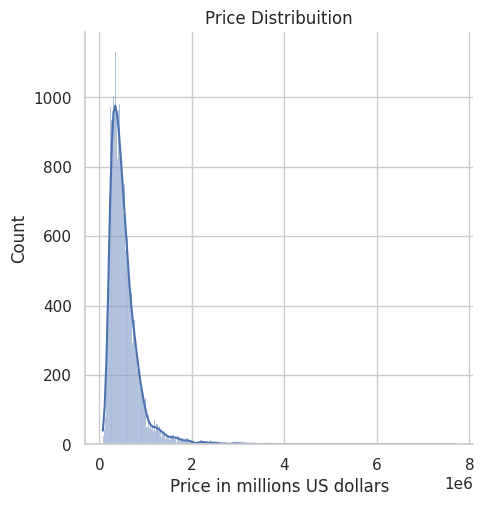

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

sns.set(style="whitegrid")
price_dis = sns.displot(df['price'],kde=True)

# Axis labels
price_dis.set(xlabel='Price in millions US dollars', title='Price Distribuition')
#price_dis.set(title="Distribution of Prices")

plt.show()

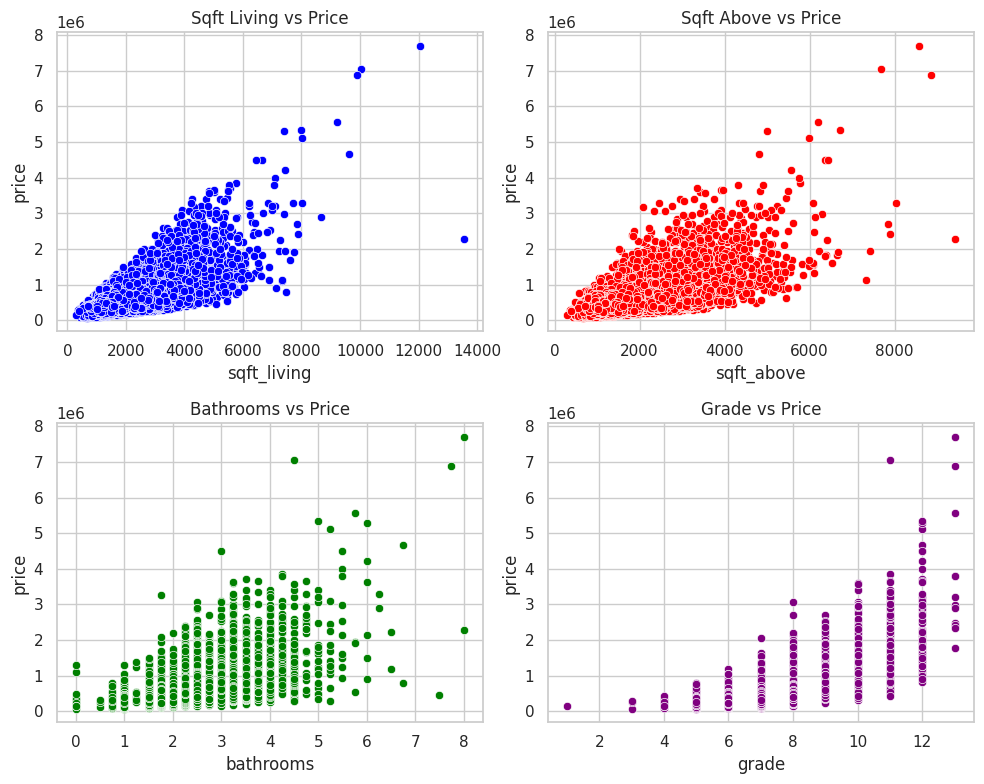

In [19]:
#Visualise attributes with highest correlations with price
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))

# Plot Sqft Living
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['sqft_living'], y=df['price'], color="blue")
plt.title('Sqft Living vs Price')

# Plot Sqft Above
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['sqft_above'], y=df['price'], color="red")
plt.title('Sqft Above vs Price')

# Plot Bathrooms
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['bathrooms'], y=df['price'], color="green")
plt.title('Bathrooms vs Price')

# Plot Grade
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['grade'], y=df['price'], color="purple")
plt.title('Grade vs Price')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

The price distribution and scatter plots show most of properties are under USD 2,000,000. As outliers have great impact on making predictions, I remove properties with price over USD 2,000,000.

In [22]:
# drop rows where 'price' is above 2,000,000
df = df[df['price'] <= 2000000]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,no_of_yr_built
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,5
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,11


Since the column of 'yr_built' and 'yr_renovated' show the actual year, which barely carry meanings for prediction. We have to compute the numbers of years between record date and built. Yet over 95% of the properties had not been renovated since built. Due to the significant class imbalance in renovated year, we will drop yr_renovated and calculate numbers of years since built.


In [23]:
#calculate number of years since built
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['no_of_yr_built']=df['date'].dt.year-df['yr_built']

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,no_of_yr_built
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,5
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,11


**Property Location**


In the dataset, 'zipcode', 'lat' and 'long' are attributes indicating the location of the property, which are commonly known as an important factors for pricing. While latitude ('lat') and longtitude('long') represent the exact location of the property, for analysis purposes, it is recommended to use zip codes ('zipcodes') to generalise the overall picture across a small area.



**Final Attribute Selection**

11 attributes are selected for price prediction.

*   bedrooms
*   bathrooms
*   sqft_living
*   sqft_lot
*   floors
*   condition
*   grade
*   sqft_basement
*   zipcode
*   sqft_living15
*   no_of_yr_built

Dropped: 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_above' and 'sqft_lot15'

In [24]:
#we drop the unwanted columns
df_reg = df.drop(['date','id','waterfront','view','yr_built','yr_renovated','long','lat','sqft_above','sqft_lot15'], axis=1)
df_reg.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,zipcode,sqft_living15,no_of_yr_built
count,2.141500e+04,21415.000000,21415.000000,21415.000000,2.141500e+04,21415.000000,21415.000000,21415.000000,21415.000000,21415.000000,21415.000000,21415.000000
mean,5.194207e+05,3.361709,2.098599,2052.398506,1.503620e+04,1.490824,3.408312,7.628625,284.709269,98078.067429,1972.544291,43.322438
std,2.878146e+05,0.924643,0.747761,863.866906,4.142753e+04,0.539335,0.649652,1.138151,430.910595,53.474856,668.963625,29.313652
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,0.000000,98001.000000,399.000000,-1.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.027000e+03,1.000000,3.000000,7.000000,0.000000,98033.000000,1480.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.579000e+03,1.500000,3.000000,7.000000,0.000000,98065.000000,1830.000000,40.000000
75%,6.350000e+05,4.000000,2.500000,2520.000000,1.056000e+04,2.000000,4.000000,8.000000,550.000000,98118.000000,2340.000000,63.000000
max,2.000000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,5.000000,13.000000,3260.000000,98199.000000,5790.000000,115.000000


In [61]:
#change data type of 'zipcode' to string
df_reg['zipcode']=df_reg['zipcode'].astype(str)

#use dummies to represent different zipcode
df_data_num = df_reg.select_dtypes(include='number')
df_data_location= pd.get_dummies(df_reg['zipcode'], prefix='location')
df_data = pd.concat([df_data_num, df_data_location], axis=1)

df_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,sqft_living15,no_of_yr_built,location_98001,location_98002,location_98003,location_98004,location_98005,location_98006,location_98007,location_98008,location_98010,location_98011,location_98014,location_98019,location_98022,location_98023,location_98024,location_98027,location_98028,location_98029,location_98030,location_98031,location_98032,location_98033,location_98034,location_98038,location_98039,location_98040,location_98042,location_98045,location_98052,location_98053,location_98055,location_98056,location_98058,location_98059,location_98065,location_98070,location_98072,location_98074,location_98075,location_98077,location_98092,location_98102,location_98103,location_98105,location_98106,location_98107,location_98108,location_98109,location_98112,location_98115,location_98116,location_98117,location_98118,location_98119,location_98122,location_98125,location_98126,location_98133,location_98136,location_98144,location_98146,location_98148,location_98155,location_98166,location_98168,location_98177,location_98178,location_98188,location_98198,location_98199
0,221900.0,3,1.00,1180,5650,1.0,3,7,0,1340,59,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,3,7,400,1690,63,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,3,6,0,2720,82,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,5,7,910,1360,49,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,510000.0,3,2.00,1680,8080,1.0,3,8,0,1800,28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df_data.shape

(21415, 81)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

label_col = 'price'

#Split the data into train and test set

train_size, valid_size, test_size = (0.7, 0.3, 0.0)
df_train, df_valid = train_test_split(df_data,
                                      test_size=valid_size,
                                      random_state=2020)

#Extract data for training and validation into x and y vectors
df_y_train = df_train[[label_col]]
df_x_train = df_train.drop(label_col, axis=1)
df_y_valid = df_valid[[label_col]]
df_x_valid = df_valid.drop(label_col, axis=1)

#Normalisation
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_x_train)
df_x_train = pd.DataFrame(scaler.transform(df_x_train),
                            columns = df_x_train.columns, index = df_x_train.index)
df_x_valid = pd.DataFrame(scaler.transform(df_x_valid),
                            columns = df_x_valid.columns, index = df_x_valid.index)

print('X train min =', round(df_x_train.min().min(),4), '; max =', round(df_x_train.max().max(), 4))
print('X valid min =', round(df_x_valid.min().min(),4), '; max =', round(df_x_valid.max().max(), 4))

df_x_valid

X train min = 0.0 ; max = 1.0
X valid min = -0.2 ; max = 3.3


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,sqft_living15,no_of_yr_built,location_98001,location_98002,location_98003,location_98004,location_98005,location_98006,location_98007,location_98008,location_98010,location_98011,location_98014,location_98019,location_98022,location_98023,location_98024,location_98027,location_98028,location_98029,location_98030,location_98031,location_98032,location_98033,location_98034,location_98038,location_98039,location_98040,location_98042,location_98045,location_98052,location_98053,location_98055,location_98056,location_98058,location_98059,location_98065,location_98070,location_98072,location_98074,location_98075,location_98077,location_98092,location_98102,location_98103,location_98105,location_98106,location_98107,location_98108,location_98109,location_98112,location_98115,location_98116,location_98117,location_98118,location_98119,location_98122,location_98125,location_98126,location_98133,location_98136,location_98144,location_98146,location_98148,location_98155,location_98166,location_98168,location_98177,location_98178,location_98188,location_98198,location_98199
4889,0.4,0.300000,0.283967,0.006098,0.0,0.50,0.4,0.437722,0.313671,0.405172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12927,0.4,0.333333,0.221467,0.010977,0.0,0.75,0.4,0.284698,0.259878,0.405172,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9861,0.4,0.333333,0.372283,0.009342,0.4,0.75,0.7,0.000000,0.502875,0.267241,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8296,0.4,0.333333,0.360054,0.007069,0.0,0.50,0.5,0.466192,0.278427,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10283,0.5,0.466667,0.635870,0.013725,0.4,0.50,0.8,0.000000,0.773697,0.120690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11188,0.3,0.333333,0.244565,0.006570,0.4,0.50,0.5,0.000000,0.341495,0.112069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1549,0.4,0.233333,0.172554,0.000825,0.0,0.75,0.4,0.291815,0.189390,0.887931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4518,0.3,0.133333,0.1127

<a id = "cell_model"></a>
## 3. Predictive Modelling

### **House Price Estimation** ###

House Price Estimation models can be used to predict the specific price of each property, or more generally to classify properties into predefined price classes.

1.   For estimation of exact house price, two models using *linear regression and neural networks* are created.
2.   For price class prediction, two classification models using *k-nearest neighbourhood and neural networks* are built.

# House Price Estimation

Linear regression model is a simple and great statistical technicques for numeric prediction if there is linear relations between the label and attributes. Neural networks model, in comparison, is more complex, but is usually more accurate due to its complexity that allows it to extract more features from the data for predictions. In additions, it can also make accurate prediction even if the relation between the label and the attributes is non-linear.



###**Linear Regression Model**

In [30]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_x_train, df_y_train)

# Make predictions using the testing set
linear_y_pred = regr.predict(df_x_valid)

# Mean squared error
print("Mean squared error: %.2f" % mean_squared_error(df_y_valid, linear_y_pred))

# Root Mean squared error
print("Root Mean squared error: %.2f" % mean_squared_error(df_y_valid, linear_y_pred, squared=False))

# Mean absolute error
print(f"Mean Absolute Error: {round(metrics.mean_absolute_error(df_y_valid, linear_y_pred), 3)}")

# R2 score
print("R2 Score: %.2f" % r2_score(df_y_valid, linear_y_pred))

# Show coefficients of the model
coef = regr.coef_
intercept = regr.intercept_

# Print the coefficients and intercept
print("Coefficients:", coef)
print("Intercept:", intercept)

Mean squared error: 15589613904.02
Root Mean squared error: 124858.38
Mean Absolute Error: 84099.315
R2 Score: 0.81
Coefficients: [[-2.05434705e+05  1.73533077e+05  1.03962978e+06  3.35128529e+05
  -3.72978213e+04  9.23647614e+04  6.27255980e+05 -1.02889332e+05
   2.58274542e+05  1.18451415e+05  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.05519394e+16  1.05519394e+16  1.05519394e+16  1.05519394e+16
   1.0551939

From our result, the absolute difference between the model predictions and the actual prices is around USD 84,000. The model explains 81% of the variation of price, the remaining 19% is explained by attributes excluded from the selected attributes. On average, the absolute difference between your model's predictions and the actual values is around USD 125,000.

###**Neural Networks Regression Model**

In [31]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop

In [32]:
arr_x_train = np.array(df_x_train)
arr_y_train = np.array(df_y_train)
arr_x_valid = np.array(df_x_valid)
arr_y_valid = np.array(df_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (14990, 80)
Training samples:  14990
Validation samples:  6425


**Neural Networks Model Structure**

Our neural networks model involves four layers. The configuration is explained below.

**1st Layer:** Input layer containing 80 neurons, using hyperbolic tangent (tanh) as the activation function for to introduce non-linearity to the network . Regularising technique of randomly dropping out 20% of the nodes is applied to reduce model over-fitting.

**2nd Layer:** A dense layer, also known as the hidden layer, containing 160 neurons to compute the features, using the Rectified Linear Unit (ReLU) function as the activation to capture the non-linearity in the data.

**3rd Layer:** Another dense layer containing 40 neurons to compute features, also using ReLU function as the activation function.

**4th Layer:** Output layer that produces results.

RMSprop are used as the optimiser and mean absolute error (MAE) as the metrics to track the model training process. There are 25,921 parameters in total.

In [33]:
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(160, activation="relu"))
    t_model.add(Dense(40, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer= RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0),
        metrics=[metrics.mae])
    return(t_model)

In [34]:
model2 = basic_model_2(arr_x_train.shape[1], arr_y_train.shape[1])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                6480      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 dense_2 (Dense)             (None, 40)                6440      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 25921 (101.25 KB)
Trainable params: 25921 (101.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
history = model2.fit(arr_x_train, arr_y_train,
    batch_size=64, #batch size for training
    epochs=200,  #number of rounds for training
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid))

Epoch 1/200
235/235 - 2s - loss: 216993316864.0000 - mean_absolute_error: 359724.4062 - val_loss: 78302076928.0000 - val_mean_absolute_error: 208025.8594 - 2s/epoch - 8ms/step
Epoch 2/200
235/235 - 1s - loss: 48417746944.0000 - mean_absolute_error: 142787.0469 - val_loss: 29637109760.0000 - val_mean_absolute_error: 107847.5000 - 587ms/epoch - 2ms/step
Epoch 3/200
235/235 - 1s - loss: 26652796928.0000 - mean_absolute_error: 104786.7891 - val_loss: 21434554368.0000 - val_mean_absolute_error: 93225.4297 - 609ms/epoch - 3ms/step
Epoch 4/200
235/235 - 1s - loss: 21952006144.0000 - mean_absolute_error: 97035.2188 - val_loss: 20056977408.0000 - val_mean_absolute_error: 97426.9141 - 588ms/epoch - 3ms/step
Epoch 5/200
235/235 - 1s - loss: 20056635392.0000 - mean_absolute_error: 95286.6016 - val_loss: 18784718848.0000 - val_mean_absolute_error: 96238.8047 - 599ms/epoch - 3ms/step
Epoch 6/200
235/235 - 1s - loss: 19159252992.0000 - mean_absolute_error: 93533.0000 - val_loss: 16403732480.0000 - va

In [36]:
train_score = model2.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model2.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val MAE: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))

Train MAE:  64021.9 , Train Loss:  10332473344.0
Val MAE:  68256.86 , Val Loss:  11541378048.0


The results show the MAE of training dataset is USD 64,000 and total error is USD 10,332,473,344. And the MAE for validation dataset is USD 68,000 and total error is USD 11,541,378,048. It means, on average, the model prediction is *USD 68,000* away from the actual price.

201/201 [==============================] - 0s 2ms/step


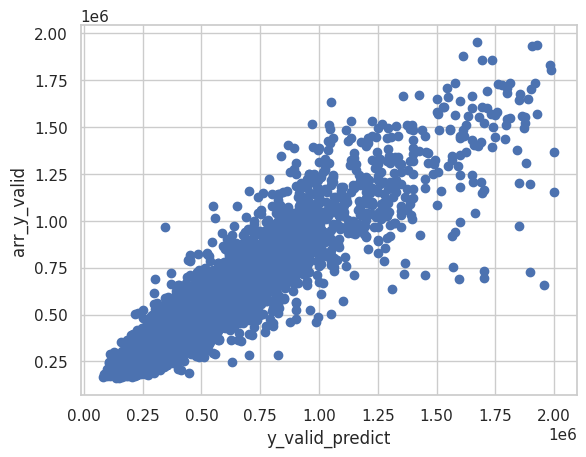

The Correlation between true and predicted values is:  0.926


In [38]:
# Plot the Correlation between true and predicted values (R)
y_valid_predict = model2.predict(arr_x_valid)
# plot
plt.scatter(arr_y_valid, y_valid_predict)
plt.ylabel('arr_y_valid')
plt.xlabel('y_valid_predict')
plt.show()

corr_result = np.corrcoef(arr_y_valid.reshape(1,6425)[0], y_valid_predict.reshape(1,6425)[0])
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))

The graph shows the correlation between true and predicted values is 92.6%. The R2 score is 85.7%.

**Visualise the Training History**

In [40]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return


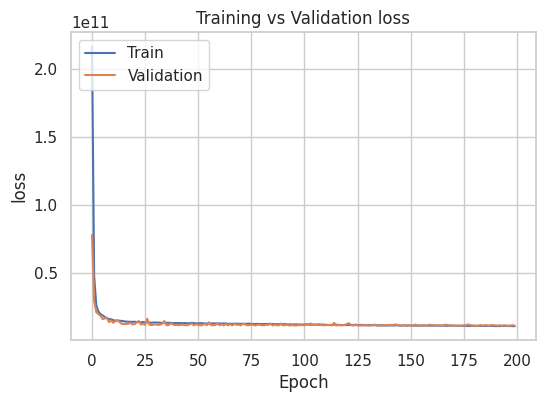

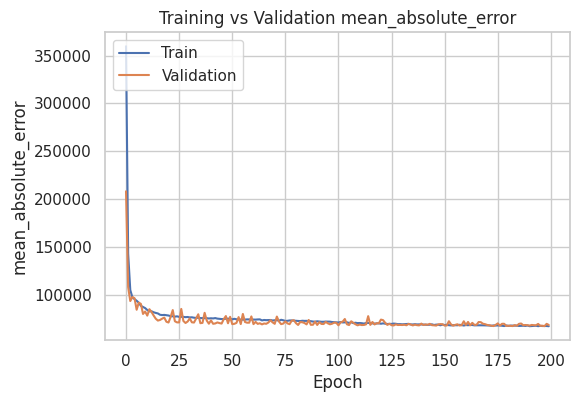

In [41]:
hist = pd.DataFrame(history.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)

The above graphs shows there is no over-fitting problem. The model is well-trained with stablised trend toward the end.

**Model Evaluation**

*   On average, a price prediction error of USD 84,000, while the neural network model shows an average prediction error of USD 64,000, which is over 23% less error than linear regression model.
*   Linear regression model shows a R2 score of 81%, whilst the neural network model displays higher score at 85.7%. This may imply the relations between house price and the selected attributes is non-linear, evident by the higher accuracy observed in the neural network model.

*   Overall, the *neural network* model outperforms linear regression, generating more accurate prediction.

#House Price Classification Model#

House Price Classification Model categorise price into two groups, High price and Low price.
Price below USD 450,000 falls into Low price group and the

*   Low price - below USD 450,000
*   High price - USD 450,000 or over

*K-Nearest Neighbour Clustering Model* and *Neural Networks Model* are built for classification and their performances are evaluated.

In [62]:
#Function to identify price class for classification modelling

#Low_Price = below $450,000
#High_Price = $450,000 or above

def knn_price_class(price):
    if price < 450000:
      return 'Low Price' #classified as low price
    else:
      return 'High Price' #classified as high price


df_1b = df_data
df_1b['price']=df_1b['price'].apply(knn_price_class)

df_1b.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,location_98177,location_98178,location_98188,location_98198,location_98199
0,Low Price,3,1.00,1180,5650,...,False,True,False,False,False
1,High Price,3,2.25,2570,7242,...,False,False,False,False,False
2,Low Price,2,1.00,770,10000,...,False,False,False,False,False
3,High Price,4,3.00,1960,5000,...,False,False,False,False,False
4,High Price,3,2.00,1680,8080,...,False,False,False,False,False
5,High Price,4,4.50,5420,101930,...,False,False,False,False,False
6,Low Price,3,2.25,1715,6819,...,False,False,False,False,False
7,Low Price,3,1.50,1060,9711,...,False,False,False,True,False
8,Low Price,3,1.00,1780,7470,...,False,False,False,False,False
9,Low Price,3,2.50,1890,6560,...,False,False,False,False,False


In [52]:
#Split data into training and validation set
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
clf_train, clf_valid = train_test_split(df_1b,
                                      test_size=valid_size,
                                      random_state=2020)

#Determine the label column for prediction
label_col = 'price'

clf_y_train = clf_train[[label_col]]
clf_x_train = clf_train.drop(label_col, axis=1)
clf_y_valid = clf_valid[[label_col]]
clf_x_valid = clf_valid.drop(label_col, axis=1)

print('Size of training set: ', len(clf_x_train))
print('Size of validation set: ', len(clf_x_valid))

Size of training set:  14990
Size of validation set:  6425


In [53]:
#Apply normalisation to minimise outlier effect
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(clf_x_train)
clf_x_train = pd.DataFrame(scaler.transform(clf_x_train),
                            columns = clf_x_train.columns, index = clf_x_train.index)
clf_x_valid = pd.DataFrame(scaler.transform(clf_x_valid),
                            columns = clf_x_valid.columns, index = clf_x_valid.index)

print('X train min =', round(clf_x_train.min().min(),4), '; max =', round(clf_x_train.max().max(), 4))
print('X valid min =', round(clf_x_valid.min().min(),4), '; max =', round(clf_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.2 ; max = 3.3


### **K-Nearest Neighbors Clustering Model**

Performance Metrics of KNN Classifier.

KNN Classifier Accuracy: 0.861
KNN Classifier Kappa: 0.722
KNN Classifier Report:
               precision    recall  f1-score   support

  High Price       0.82      0.92      0.87      3228
   Low Price       0.91      0.80      0.85      3197

    accuracy                           0.86      6425
   macro avg       0.87      0.86      0.86      6425
weighted avg       0.87      0.86      0.86      6425



Text(0.5, 1.0, 'KNN Classifier Confusion Matrix')

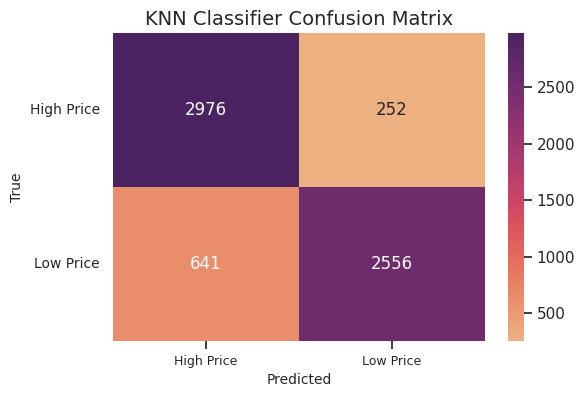

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

labels = ["High Price","Low Price"]

# Model Generation Using k_nearest neighbors Classifier
clf = KNeighborsClassifier(n_neighbors=2).fit(clf_x_train, clf_y_train)
predicted= clf.predict(clf_x_valid)
confusion_mat_Knn = metrics.confusion_matrix(clf_y_valid, predicted, labels = labels)

print('Performance Metrics of KNN Classifier.\n')
print("KNN Classifier Accuracy:", round(metrics.accuracy_score(clf_y_valid, predicted),3))
print("KNN Classifier Kappa:", round(metrics.cohen_kappa_score(clf_y_valid, predicted),3))
print("KNN Classifier Report:\n",
      metrics.classification_report(clf_y_valid, predicted, labels=labels))

#visualise confusion matrix
fig = plt.figure(figsize=(6, 4))
ax= plt.subplot()
sns.heatmap(confusion_mat_Knn, cmap="flare", annot=True, ax = ax, fmt = 'g');
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_ticklabels(labels, fontsize = 9)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('KNN Classifier Confusion Matrix', fontsize=14)


The K-nn model shows an accuracy of 86.1%, with a substential kappa score at 0.72. Based on the confusion matrix, the model has difficulties in classifying the true low price properties, with only 80% of low price properties are correctly identified shown by the recall rate. In comparison, it performs much better on classifying high price property, with a 92% of recall rate.

### **Neural Networks Price Classification Model**

In [55]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Nadam, RMSprop
from tensorflow.keras.losses import categorical_crossentropy

Neural Networks cannot process nominal classes. Therefore, we have to apply one-hot encoding to transform the label data into binary variables to fit into the model.

In [63]:
def nn_price_class(price):
    if price == 'Low Price':
      return 0 #classified as low price
    else:
      return 1 #classified as high price


In [64]:
df_nn = df_1b
df_nn['price']=df_nn['price'].apply(nn_price_class)

df_nn

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,sqft_living15,no_of_yr_built,location_98001,location_98002,location_98003,location_98004,location_98005,location_98006,location_98007,location_98008,location_98010,location_98011,location_98014,location_98019,location_98022,location_98023,location_98024,location_98027,location_98028,location_98029,location_98030,location_98031,location_98032,location_98033,location_98034,location_98038,location_98039,location_98040,location_98042,location_98045,location_98052,location_98053,location_98055,location_98056,location_98058,location_98059,location_98065,location_98070,location_98072,location_98074,location_98075,location_98077,location_98092,location_98102,location_98103,location_98105,location_98106,location_98107,location_98108,location_98109,location_98112,location_98115,location_98116,location_98117,location_98118,location_98119,location_98122,location_98125,location_98126,location_98133,location_98136,location_98144,location_98146,location_98148,location_98155,location_98166,location_98168,location_98177,location_98178,location_98188,location_98198,location_98199
0,0,3,1.00,1180,5650,1.0,3,7,0,1340,59,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,1,3,2.25,2570,7242,2.0,3,7,400,1690,63,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,2,1.00,770,10000,1.0,3,6,0,2720,82,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,4,3.00,1960,5000,1.0,5,7,910,1360,49,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,1,3,2.00,1680,8080,1.0,3,8,0,1800,28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,3,2.50,1530,1131,3.0,3,8,0,1530,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [65]:
#split the data for training and validation

train_size, valid_size, test_size = (0.7, 0.3, 0.0)
nn_train, nn_valid = train_test_split(df_1b,
                                      test_size=valid_size,
                                      random_state=2020)

label_col = 'price'

nn_y_train = nn_train[[label_col]]
nn_x_train = nn_train.drop(label_col, axis=1)
nn_y_valid = nn_valid[[label_col]]
nn_x_valid = nn_valid.drop(label_col, axis=1)

print('Size of training set: ', len(nn_x_train))
print('Size of validation set: ', len(nn_x_valid))

Size of training set:  14990
Size of validation set:  6425


In [66]:
#data normalisation
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(nn_x_train)
nn_x_train = pd.DataFrame(scaler.transform(nn_x_train),
                            columns = nn_x_train.columns, index = nn_x_train.index)
nn_x_valid = pd.DataFrame(scaler.transform(nn_x_valid),
                            columns = nn_x_valid.columns, index = nn_x_valid.index)

print('X train min =', round(nn_x_train.min().min(),4), '; max =', round(nn_x_train.max().max(), 4))
print('X valid min =', round(nn_x_valid.min().min(),4), '; max =', round(nn_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.2 ; max = 3.3


In [67]:
#One hot encoding
from tensorflow.keras.utils import to_categorical

nn_arr_x_train = np.array(nn_x_train)
nn_arr_y_train = np.array(nn_y_train)
nn_arr_x_valid = np.array(nn_x_valid)
nn_arr_y_valid = np.array(nn_y_valid)

# convert class vectors to binary class matrices
nn_arr_y_train = to_categorical(nn_arr_y_train, 2)
nn_arr_y_valid = to_categorical(nn_arr_y_valid, 2)

print('Train shape: x=', nn_arr_x_train.shape, ', y=', nn_arr_y_train.shape)
print('Test shape: x=', nn_arr_x_valid.shape, ', y=', nn_arr_y_valid.shape)

Train shape: x= (14990, 80) , y= (14990, 2)
Test shape: x= (6425, 80) , y= (6425, 2)


In [68]:
nn_x_valid.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,sqft_living15,no_of_yr_built,location_98001,location_98002,location_98003,location_98004,location_98005,location_98006,location_98007,location_98008,location_98010,location_98011,location_98014,location_98019,location_98022,location_98023,location_98024,location_98027,location_98028,location_98029,location_98030,location_98031,location_98032,location_98033,location_98034,location_98038,location_98039,location_98040,location_98042,location_98045,location_98052,location_98053,location_98055,location_98056,location_98058,location_98059,location_98065,location_98070,location_98072,location_98074,location_98075,location_98077,location_98092,location_98102,location_98103,location_98105,location_98106,location_98107,location_98108,location_98109,location_98112,location_98115,location_98116,location_98117,location_98118,location_98119,location_98122,location_98125,location_98126,location_98133,location_98136,location_98144,location_98146,location_98148,location_98155,location_98166,location_98168,location_98177,location_98178,location_98188,location_98198,location_98199
4889,0.4,0.300000,0.283967,0.006098,0.0,0.50,0.4,0.437722,0.313671,0.405172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12927,0.4,0.333333,0.221467,0.010977,0.0,0.75,0.4,0.284698,0.259878,0.405172,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9861,0.4,0.333333,0.372283,0.009342,0.4,0.75,0.7,0.000000,0.502875,0.267241,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8296,0.4,0.333333,0.360054,0.007069,0.0,0.50,0.5,0.466192,0.278427,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10283,0.5,0.466667,0.635870,0.013725,0.4,0.50,0.8,0.000000,0.773697,0.120690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Model Configuration**

The Neural Networks Price Classification Model consists of four layers. The model structure is explained below.


*   1st Layer - Input layer with 100 neurons, using ReLU as the activation to ensure the output is positive. Regularizing technique of randomly dropping out 20% of the nodes is applied to reduce over-fitting.

*   2nd Layer - Dense layer with 70 neurons, using ReLU as the activation to ensure the output is positive.

*   3rd Layer - Another dense layer with 40 neurons, again using ReLU as the activation to ensure the output is positive.

*   4th Layer - Output layer with 2 nodes, since we are prediction two classes. Softmax is used as activition to ensure the output is between 0 and 1 as it is probabilities based.

The model contains a total of 18,092 parameters. Nadam is the optimiser for training at 0.003 learning rate, using accuracy to track the training process.

In [69]:
def clf_model():
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(80,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(70, activation="relu"))
    t_model.add(Dense(40, activation="relu"))
    t_model.add(Dense(2, activation="softmax"))
    t_model.summary()
    return(t_model)

In [70]:
clf_model = clf_model()
clf_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               8100      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 70)                7070      
                                                                 
 dense_6 (Dense)             (None, 40)                2840      
                                                                 
 dense_7 (Dense)             (None, 2)                 82        
                                                                 
Total params: 18092 (70.67 KB)
Trainable params: 18092 (70.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential

In [71]:
clf_model.compile(optimizer=Nadam(learning_rate=0.003),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

clf_history = clf_model.fit(nn_arr_x_train, nn_arr_y_train,
    batch_size=64, #number of samples each batch for training
    epochs=100, #rounds of training
    shuffle=True,
    verbose=2,
    validation_data=(nn_arr_x_valid, nn_arr_y_valid))

Epoch 1/100
235/235 - 5s - loss: 0.3330 - accuracy: 0.8480 - val_loss: 0.2889 - val_accuracy: 0.8744 - 5s/epoch - 22ms/step
Epoch 2/100
235/235 - 1s - loss: 0.2649 - accuracy: 0.8840 - val_loss: 0.2515 - val_accuracy: 0.8928 - 650ms/epoch - 3ms/step
Epoch 3/100
235/235 - 1s - loss: 0.2513 - accuracy: 0.8917 - val_loss: 0.2452 - val_accuracy: 0.8946 - 669ms/epoch - 3ms/step
Epoch 4/100
235/235 - 1s - loss: 0.2438 - accuracy: 0.8939 - val_loss: 0.2420 - val_accuracy: 0.8965 - 841ms/epoch - 4ms/step
Epoch 5/100
235/235 - 1s - loss: 0.2387 - accuracy: 0.8960 - val_loss: 0.2401 - val_accuracy: 0.9001 - 1s/epoch - 5ms/step
Epoch 6/100
235/235 - 1s - loss: 0.2353 - accuracy: 0.8994 - val_loss: 0.2421 - val_accuracy: 0.8982 - 834ms/epoch - 4ms/step
Epoch 7/100
235/235 - 1s - loss: 0.2317 - accuracy: 0.9008 - val_loss: 0.2575 - val_accuracy: 0.8928 - 646ms/epoch - 3ms/step
Epoch 8/100
235/235 - 1s - loss: 0.2324 - accuracy: 0.8994 - val_loss: 0.2432 - val_accuracy: 0.8962 - 669ms/epoch - 3ms/st

In [72]:
nn_train_score = clf_model.evaluate(nn_arr_x_train, nn_arr_y_train, verbose=0)
nn_valid_score = clf_model.evaluate(nn_arr_x_valid, nn_arr_y_valid, verbose=0)

print('Train Accuracy: ', round(nn_train_score[1], 2), ', Train Loss: ', round(nn_train_score[0], 2))
print('Val Accuracy: ', round(nn_valid_score[1], 2), ', Val Loss: ', round(nn_valid_score[0], 2))

Train Accuracy:  0.94 , Train Loss:  0.14
Val Accuracy:  0.9 , Val Loss:  0.31


In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
nn_y_pred = clf_model.predict(nn_arr_x_valid)

# Convert the predicted labels to continuous-multioutput format
nn_y_pred_continuous = np.round(nn_y_pred)

# Convert the predicted labels to multiclass format
nn_y_pred_multiclass = np.argmax(nn_y_pred, axis=1)
nn_arr_y_valid = np.argmax(nn_arr_y_valid, axis=1)

# Calculate the kappa score
nn_kappa = cohen_kappa_score(nn_arr_y_valid, nn_y_pred_multiclass)
print("The result of Kappa is :", round(nn_kappa, 3))

# Generate the classification report
nn_report = classification_report(nn_arr_y_valid, nn_y_pred_multiclass)

# Print the report
print("The result of the NN classification report is: \n ",nn_report)

201/201 [==============================] - 2s 9ms/step
The result of Kappa is : 0.796
The result of the NN classification report is: 
                precision    recall  f1-score   support

           0       0.90      0.89      0.90      3197
           1       0.89      0.91      0.90      3228

    accuracy                           0.90      6425
   macro avg       0.90      0.90      0.90      6425
weighted avg       0.90      0.90      0.90      6425



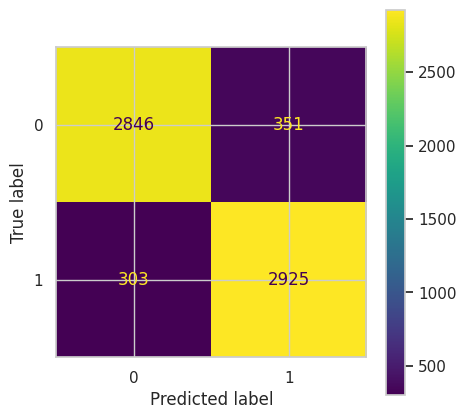

In [74]:
#generate heat map for NN model
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    nn_arr_y_valid,
    nn_y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm)

# Create a figure with a fixed size
fig = plt.figure(figsize=(5, 5))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

**Model Evaluation**



*   NN model outperforms the k-NN model by 4% accuracy and 0.07 kappa score.
*   k-NN model finds it hard to correctly classifying low price properties at the recall rate of 80%, NN model seems have no such problem, illustrated by its recall rate at 89% shown in the confustion matrix.
*   Overall, NN model outperforms the k-NN model.

**Overall Model Improvement**

Different NN model configuration was experimented. The experimental results show more hidden layers or introducing more parameters does not have great effect on performance improvements. In contrast, adequately applying drop out is essential to avoid over-fitting, and produces a more practical and accurate model.

Deep learning models relies heavily on vast amount of data for them to learn from to make prediction. Feeding more data to the model is a direct way to improve the performance. Also, the model architecture has great impact on model performance. Trial and error is an easy way to test the suitable architecture but maybe time consuming.

<a id = "cell_report"></a>
# 4. Business Implication

**Business Implication**

House Price Estimation Models aims to predict house price based on historical transaction record of properties. Neural networks models can make good use of the data that has already been stored in the company to provide valuable insights. It helps to predict the fluctuations of house price, which greatly affect the Real Estate Companies in terms of influencing most of their revenue sourced from sales volumns, turnovers and commissions in the housing market. Meanwhile, real estate agents need to provide professional pricing advices to their clients, who act as the middle men between buyers and sellers to balance the benefit of the two parties.

In this sense, house price prediction models can assist the followings:
  
*   In the strategic level, helps them to forecast the coming trend of the house market to aid their strategic decision making, such as better anticipation for downturns, or more effectively capturing the opportunities associated with the upturns.
*   In the operational level, price forecast assists the real estate agents to provide more accurate pricing advices to their clients, which increases their customer satisfaction. Also, it helps them to maximise the commission margins by optimising the balance between house buyers and sellers.





